# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Dataset

In [2]:

# Load the dataset
df = pd.read_csv("merged_air_quality.csv")  # Replace with actual filename

print(df.head(5))


   id_station indicator_code indicator_name indicator_dimension   value  \
0        1172            NH3            NH₃                 ppm     NaN   
1        1172             CO             CO                 ppm     NaN   
2        1172            NO2            NO₂                 ppm     NaN   
3        1172        NH3-raw        NH3-raw                 NaN -787.06   
4        1172         CO-raw         CO-raw                 NaN -937.77   

              datetime                   source  
0  2020-12-24 13:48:06  https://eco-city.org.ua  
1  2020-12-24 13:48:06  https://eco-city.org.ua  
2  2020-12-24 13:48:06  https://eco-city.org.ua  
3  2020-12-24 13:48:06  https://eco-city.org.ua  
4  2020-12-24 13:48:06  https://eco-city.org.ua  


### Describing the dataset

In [3]:
# Shape of the dataset
print("Dataset shape:", df.shape)

Dataset shape: (12897414, 7)


In [4]:
# Column names and types
print("Column Info:")
print(df.info())

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12897414 entries, 0 to 12897413
Data columns (total 7 columns):
 #   Column               Dtype  
---  ------               -----  
 0   id_station           int64  
 1   indicator_code       object 
 2   indicator_name       object 
 3   indicator_dimension  object 
 4   value                float64
 5   datetime             object 
 6   source               object 
dtypes: float64(1), int64(1), object(5)
memory usage: 688.8+ MB
None


In [5]:
# Summary statistics
print("\nDescriptive Statistics:")
print(df.describe(include='all'))


Descriptive Statistics:
          id_station      indicator_code indicator_name indicator_dimension  \
count   1.289741e+07            12897414       12897414            12897411   
unique           NaN                  30             15                   7   
top              NaN  BME280_temperature    Temperature               ug/m3   
freq             NaN             1874009        2241122             5149407   
mean    8.233735e+02                 NaN            NaN                 NaN   
std     3.158297e+02                 NaN            NaN                 NaN   
min     3.370000e+02                 NaN            NaN                 NaN   
25%     6.500000e+02                 NaN            NaN                 NaN   
50%     7.610000e+02                 NaN            NaN                 NaN   
75%     1.172000e+03                 NaN            NaN                 NaN   
max     1.315000e+03                 NaN            NaN                 NaN   

               value      

In [6]:

# Missing values count
print("\nMissing Values Per Column:")
print(df.isnull().sum())


Missing Values Per Column:
id_station             0
indicator_code         0
indicator_name         0
indicator_dimension    3
value                  3
datetime               0
source                 0
dtype: int64


## Making suitable changes

In [131]:
# Convert datetime to actual datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# converting the long format into wide format of the dataset
df_pivot = df.pivot_table(
    index='datetime',
    columns='indicator_name',
    values='value',
    aggfunc='mean'  # In case multiple entries per datetime
).reset_index()

# Display first few rows
df_pivot.head()


indicator_name,datetime,CH₂O,CO,CO-raw,CO₂,Humidity,NH3-raw,NO2-raw,NO₂,O₃,PM1.0,PM10,PM2.5,Pressure,Temperature
0,2020-11-27 00:00:31,NaN,NaN,NaN,NaN,92.96,NaN,NaN,NaN,NaN,37.88,82.69,62.81,98580.72,0.22
1,2020-11-27 00:00:57,NaN,NaN,NaN,734.0,33.23,NaN,NaN,NaN,NaN,55.00,101.80,92.13,98891.66,24.32
2,2020-11-27 00:01:33,NaN,NaN,NaN,NaN,92.96,NaN,NaN,NaN,NaN,37.67,80.07,60.93,98580.72,0.22
3,2020-11-27 00:01:59,NaN,NaN,NaN,736.0,33.54,NaN,NaN,NaN,NaN,52.87,100.67,88.80,98892.43,24.32
4,2020-11-27 00:02:36,NaN,NaN,NaN,NaN,92.99,NaN,NaN,NaN,NaN,38.40,83.13,63.07,98578.09,0.22


In [8]:
# Count nulls
print(df_pivot.isnull().sum())



indicator_name
datetime             0
CH₂O           1472417
CO             1823833
CO-raw         1946955
CO₂            1399593
Humidity          4147
NH3-raw        1946955
NO2-raw        1946955
NO₂            1823833
O₃             1823833
PM1.0           772820
PM10             22285
PM2.5            22285
Pressure          4146
Temperature       4146
dtype: int64


In [9]:
# Forward fill missing values
df_pivot_ffill = df_pivot.fillna(method='ffill')

# If any NaNs still remain at the start, use backfill
df_pivot_ffill = df_pivot_ffill.fillna(method='bfill')


C:\Users\monus\AppData\Local\Temp\ipykernel_16116\2490013118.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot_ffill = df_pivot.fillna(method='ffill')
C:\Users\monus\AppData\Local\Temp\ipykernel_16116\2490013118.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot_ffill = df_pivot_ffill.fillna(method='bfill')


In [132]:
# Shape of the dataset
print("Dataset shape:", df_pivot_ffill.shape)

Dataset shape: (1946956, 19)


In [133]:
print(df_pivot_ffill.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946956 entries, 0 to 1946955
Data columns (total 19 columns):
 #   Column       Dtype         
---  ------       -----         
 0   datetime     datetime64[ns]
 1   CH₂O         float64       
 2   CO           float64       
 3   CO-raw       float64       
 4   CO₂          float64       
 5   Humidity     float64       
 6   NH3-raw      float64       
 7   NO2-raw      float64       
 8   NO₂          float64       
 9   O₃           float64       
 10  PM1.0        float64       
 11  PM10         float64       
 12  PM2.5        float64       
 13  Pressure     float64       
 14  Temperature  float64       
 15  hour         int32         
 16  day          int32         
 17  month        int32         
 18  weekday      int32         
dtypes: datetime64[ns](1), float64(14), int32(4)
memory usage: 252.5 MB
None


In [126]:
print(df_pivot_ffill.describe())

indicator_name                       datetime          CH₂O            CO  \
count                                 1946956  1.946956e+06  1.946956e+06   
mean            2021-06-14 00:59:11.159845632  8.911572e+00  5.000007e-01   
min                       2020-11-27 00:00:31  9.000000e-03  5.000000e-01   
25%             2021-03-08 09:39:14.249999872  9.000000e+00  5.000000e-01   
50%                2021-06-07 15:51:49.500000  1.000000e+01  5.000000e-01   
75%                2021-09-16 10:51:17.500000  1.000000e+01  5.000000e-01   
max                       2022-02-11 20:08:49  2.660000e+03  1.800000e+00   
std                                       NaN  4.297845e+00  9.316768e-04   

indicator_name        CO-raw           CO₂      Humidity       NH3-raw  \
count           1.946956e+06  1.946956e+06  1.946956e+06  1.946956e+06   
mean           -9.377700e+02  5.865211e+02  5.921614e+01 -7.870600e+02   
min            -9.377700e+02  4.000000e+02  0.000000e+00 -7.870600e+02   
25%       

In [127]:
# Calculate range
feature_range = df_pivot_ffill.max() - df_pivot_ffill.min()

# Show result
print("Range of each feature:")
print(feature_range)

Range of each feature:
indicator_name
datetime       441 days 20:08:18
CH₂O                    2659.991
CO                           1.3
CO-raw                       0.0
CO₂                       2108.0
Humidity                   100.0
NH3-raw                      0.0
NO2-raw                      0.0
NO₂                        0.148
O₃                           0.1
PM1.0                     363.16
PM10                      1999.9
PM2.5                    1168.43
Pressure               146350.36
Temperature               338.51
hour                          23
day                           30
month                         11
weekday                        6
dtype: object


In [128]:
summary = df_pivot_ffill.describe().loc[["min", "max"]].T
summary["range"] = summary["max"] - summary["min"]
print(summary)


                                min                  max              range
indicator_name                                                             
datetime        2020-11-27 00:00:31  2022-02-11 20:08:49  441 days 20:08:18
CH₂O                          0.009               2660.0           2659.991
CO                              0.5                  1.8                1.3
CO-raw                      -937.77              -937.77                0.0
CO₂                           400.0               2508.0             2108.0
Humidity                        0.0                100.0              100.0
NH3-raw                     -787.06              -787.06                0.0
NO2-raw                      -16.75               -16.75                0.0
NO₂                             0.0                0.148              0.148
O₃                             0.01                 0.11                0.1
PM1.0                         -0.06                363.1             363.16
PM10        

### Detecting and Handling outliers

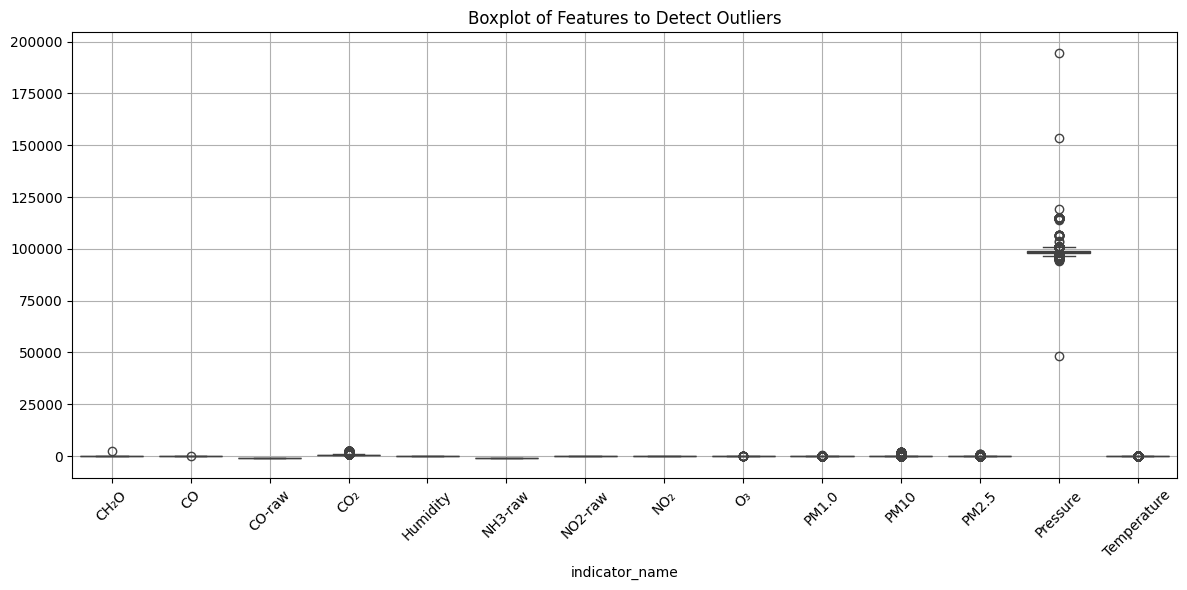

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop datetime if it exists
df_numeric = df_pivot.drop(columns=['datetime'], errors='ignore')

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_numeric)
plt.title("Boxplot of Features to Detect Outliers")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [135]:
# Function to detect and flag outliers
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] < lower) | (data[column] > upper)]

# Example: Outliers in PM2.5
outliers_pm25 = detect_outliers_iqr(df_numeric, 'PM2.5')
print(f"PM2.5 Outliers Found: {len(outliers_pm25)}")


PM2.5 Outliers Found: 128444


In [136]:
# Define the top 10 important features
top_10_features = ["PM10", "PM1.0", "Humidity", "Temperature",
                   "Pressure", "hour", "CO₂", "month", "day", "CH₂O"]

# Create a copy to avoid modifying original DataFrame
df_cleaned = df_pivot.copy()

# Define the IQR outlier removal function
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

# Iteratively remove outliers from each top feature
for col in top_10_features:
    if col in df_cleaned.columns:  # Ensure the column exists
        df_cleaned = remove_outliers_iqr(df_cleaned, col)

print("Shape after removing outliers:", df_cleaned.shape)


Shape after removing outliers: (101171, 15)


### Feature Engineering: Time-Based Features

In [13]:
# Extract time-based features
df_pivot_ffill['hour'] = df_pivot_ffill['datetime'].dt.hour
df_pivot_ffill['day'] = df_pivot_ffill['datetime'].dt.day
df_pivot_ffill['month'] = df_pivot_ffill['datetime'].dt.month
df_pivot_ffill['weekday'] = df_pivot_ffill['datetime'].dt.weekday

# Drop datetime (not numeric)
df_model = df_pivot_ffill.drop(columns=['datetime'])


## Visualize Pollutants Over Time

C:\Users\monus\AppData\Local\Temp\ipykernel_16116\4042304788.py:16: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\monus\AirQualityProject\tfvenv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


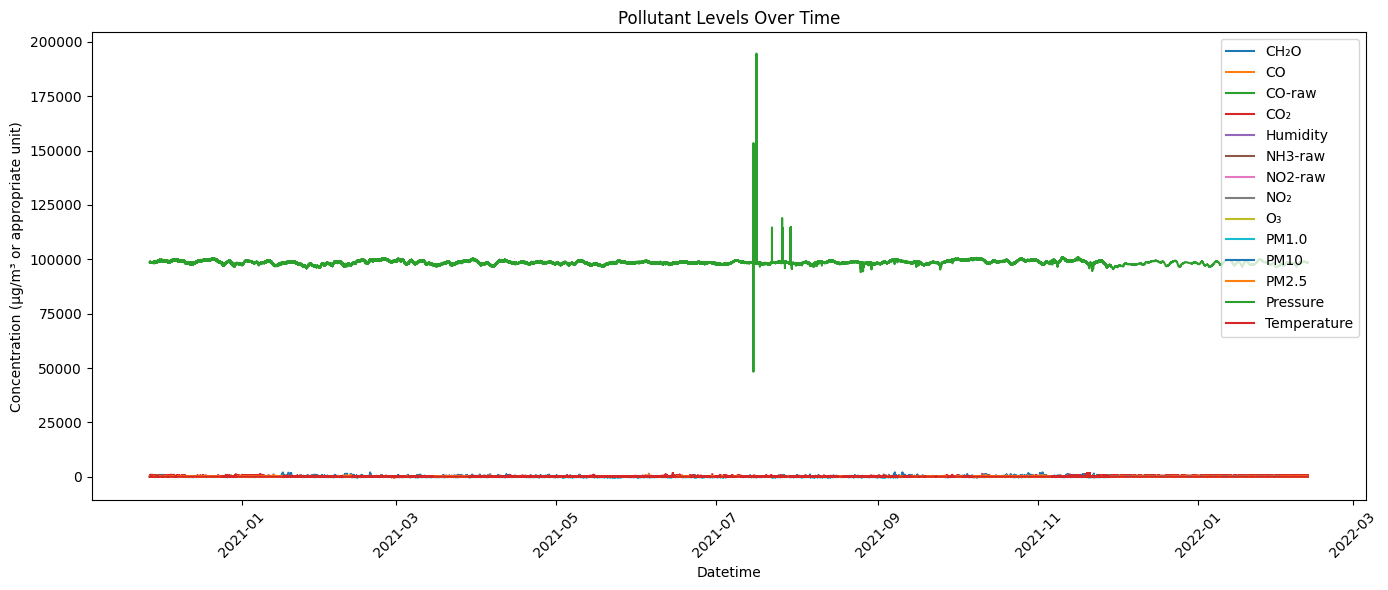

In [137]:
import matplotlib.pyplot as plt

# Assuming df_pivot has 'datetime' and all pollutant columns
plt.figure(figsize=(14, 6))

# Loop through all pollutant columns (excluding 'datetime')
for col in df_pivot.columns:
    if col != 'datetime':
        plt.plot(df_pivot['datetime'], df_pivot[col], label=col)

plt.legend()
plt.title('Pollutant Levels Over Time')
plt.xlabel('Datetime')
plt.ylabel('Concentration (µg/m³ or appropriate unit)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## Correlation Analysis

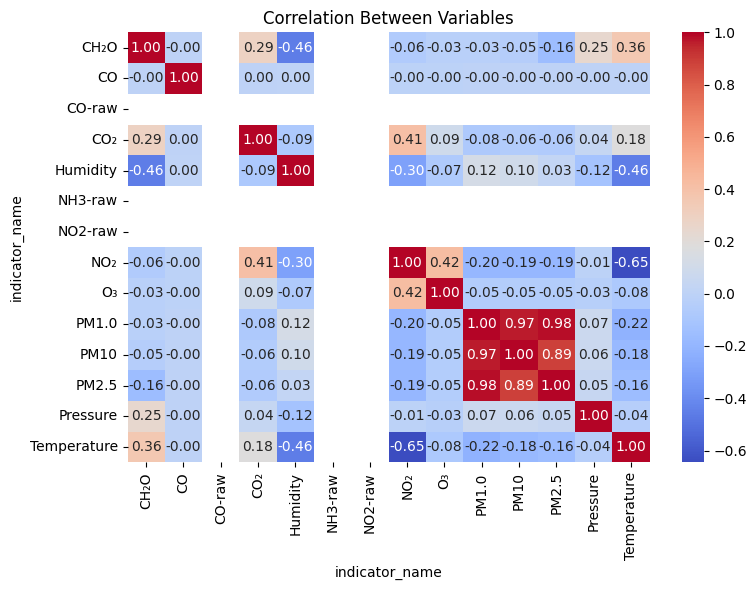

In [15]:
import seaborn as sns

# Drop datetime for correlation analysis
df_corr = df_pivot.drop(columns='datetime')

# Correlation matrix
corr = df_corr.corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Variables")
plt.tight_layout()
plt.show()



## Features Distribution

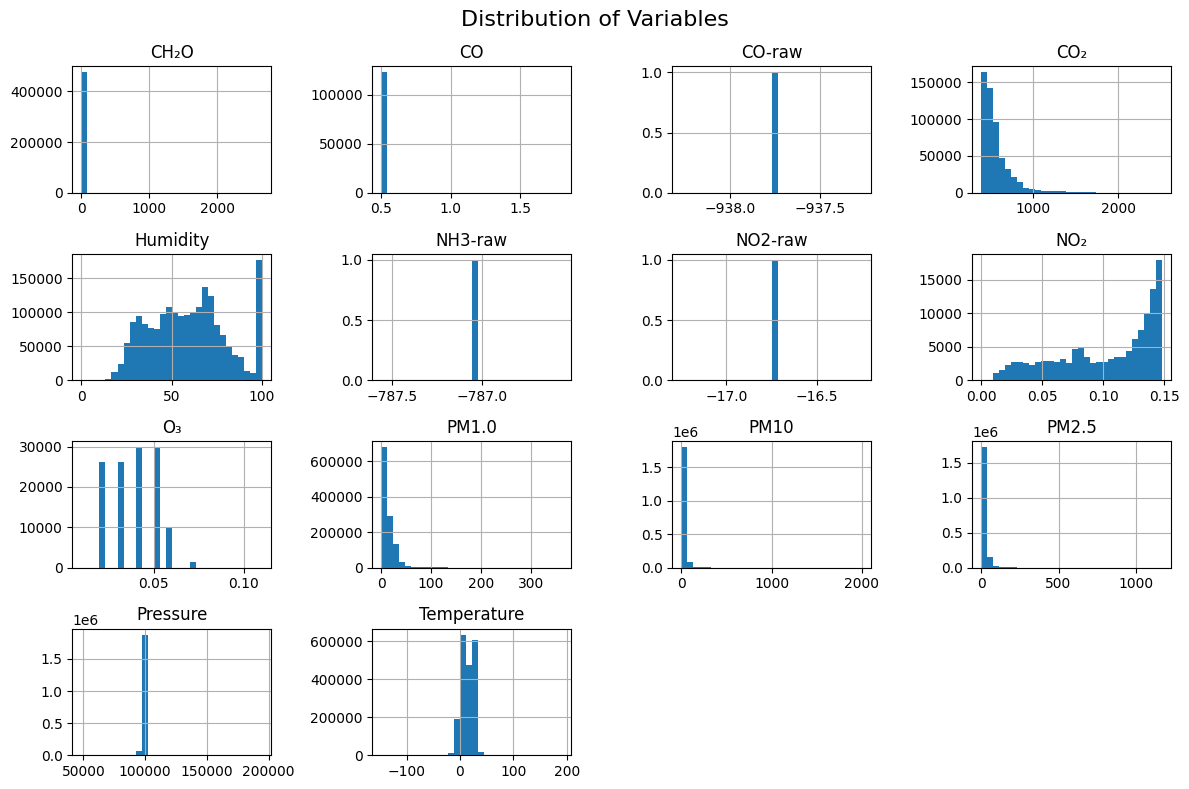

In [16]:
# Histograms for all pollutants/weather
df_corr.hist(figsize=(12, 8), bins=30)
plt.suptitle("Distribution of Variables", fontsize=16)
plt.tight_layout()
plt.show()


In [17]:
# Identify Features That Affect PM2.5
correlation_with_pm25 = corr['PM2.5'].drop('PM2.5').sort_values(ascending=False)
print(" Features most correlated with PM2.5:\n")
print(correlation_with_pm25)

 Features most correlated with PM2.5:

indicator_name
PM1.0          0.982453
PM10           0.889027
Pressure       0.048003
Humidity       0.025852
CO            -0.002092
O₃            -0.053466
CO₂           -0.064060
Temperature   -0.159755
CH₂O          -0.160784
NO₂           -0.192311
CO-raw              NaN
NH3-raw             NaN
NO2-raw             NaN
Name: PM2.5, dtype: float64


# Splitting data

In [104]:
# REVISED FULL CODE: Train/Test Split, Models, Predictions, Graphs

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import joblib
import matplotlib.pyplot as plt

In [141]:
# Step 4: Define top 10 important features and target
top_10_features = ["PM10", "PM1.0", "Humidity", "Temperature",
                   "Pressure", "hour", "CO₂", "month", "day", "CH₂O"]

# Check for missing columns
missing_features = [feat for feat in top_10_features if feat not in df_pivot_ffill.columns]
if missing_features:
    raise ValueError(f"Missing features in dataset: {missing_features}")

X = df_pivot_ffill[top_10_features]
y = df_pivot_ffill["PM2.5"]

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 6: Clip outliers (optional, but good for environmental data)
def clip_outliers(X_df, clip_value=3):
    mean = X_df.mean()
    std = X_df.std()
    lower = mean - clip_value * std
    upper = mean + clip_value * std
    return X_df.clip(lower=lower, upper=upper, axis=1)

X_train = clip_outliers(X_train)
X_val = clip_outliers(X_val)
X_test = clip_outliers(X_test)

# Step 7: Scaling
X_scaler = StandardScaler()
X_train_scaled = X_scaler.fit_transform(X_train)
X_val_scaled = X_scaler.transform(X_val)
X_test_scaled = X_scaler.transform(X_test)
joblib.dump(X_scaler, "scaler_X.pkl")

y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_val_scaled = y_scaler.transform(y_val.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))
joblib.dump(y_scaler, "target_scaler.pkl")

# Step 8: Save preprocessed test sets
np.save("X_test_scaled.npy", X_test_scaled)
np.save("y_test.npy", y_test_scaled)

print("Data prepared and saved successfully.")

Data prepared and saved successfully.


In [142]:
# Load the test data
X_test_scaled = np.load('X_test_scaled.npy')

# Check the shape of the array
print("Shape of X_test_scaled:", X_test_scaled.shape)

Shape of X_test_scaled: (389392, 10)


# Modeling neural network

In [143]:
# ==========================
# 2. Basic DNN Model (unscaled y)
# ==========================
basic_model = Sequential([
    Dense(64, activation='relu', input_shape=(len(top_10_features),)),
    Dense(32, activation='relu'),
    Dense(1)
])
basic_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

early_stop_basic = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_basic = basic_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=50,
    batch_size=512,
    callbacks=[early_stop_basic],
    verbose=1
)

basic_model.save("basic_dnn_model.h5")


Epoch 1/50
2434/2434 [==============================] - 7s 3ms/step - loss: 190.0034 - mae: 4.8474 - val_loss: 140.3194 - val_mae: 3.7950
Epoch 2/50
2434/2434 [==============================] - 6s 2ms/step - loss: 125.2946 - mae: 3.5126 - val_loss: 126.6639 - val_mae: 3.5492
Epoch 3/50
2434/2434 [==============================] - 6s 2ms/step - loss: 114.7624 - mae: 3.2720 - val_loss: 117.9449 - val_mae: 3.2989
Epoch 4/50
2434/2434 [==============================] - 6s 2ms/step - loss: 107.7944 - mae: 3.1382 - val_loss: 112.3531 - val_mae: 3.2622
Epoch 5/50
2434/2434 [==============================] - 6s 3ms/step - loss: 102.6685 - mae: 3.0598 - val_loss: 107.4791 - val_mae: 3.4001
Epoch 6/50
2434/2434 [==============================] - 6s 2ms/step - loss: 97.8151 - mae: 2.9997 - val_loss: 101.2897 - val_mae: 3.1398
Epoch 7/50
2434/2434 [==============================] - 6s 2ms/step - loss: 92.6893 - mae: 2.9532 - val_loss: 95.2530 - val_mae: 3.0370
Epoch 8/50
2434/2434 [===============

In [144]:
basic_eval = basic_model.evaluate(X_test_scaled, y_test, verbose=1)
print(f"Basic DNN - Loss: {basic_eval[0]:.2f}, MAE: {basic_eval[1]:.2f}")

12169/12169 [==============================] - 15s 1ms/step - loss: 59.0338 - mae: 2.4540
Basic DNN - Loss: 59.03, MAE: 2.45


In [145]:
# ==========================
# 3. Improved DNN Model (scaled y)
# ==========================
def build_improved_dnn(input_dim):
    model = Sequential([
        Dense(256, activation='relu', input_shape=(input_dim,)),
        BatchNormalization(),
        Dropout(0.2),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    return model





In [146]:
improved_model = build_improved_dnn(len(top_10_features))
improved_model.compile(optimizer=Adam(learning_rate=0.0005), 
                       loss='mse', 
                       metrics=['mae'])
early_stop_improved = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)



In [147]:
history_improved = improved_model.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_val_scaled, y_val_scaled),
    epochs=50,
    batch_size=512,
    callbacks=[early_stop_improved, lr_schedule],
    verbose=1
)
improved_model.save("improved_dnn_model.h5")

Epoch 1/50
2434/2434 [==============================] - 27s 10ms/step - loss: 0.2109 - mae: 0.2115 - val_loss: 0.1323 - val_mae: 0.1091 - lr: 5.0000e-04
Epoch 2/50
2434/2434 [==============================] - 25s 10ms/step - loss: 0.1405 - mae: 0.1439 - val_loss: 0.1172 - val_mae: 0.0945 - lr: 5.0000e-04
Epoch 3/50
2434/2434 [==============================] - 22s 9ms/step - loss: 0.1171 - mae: 0.1285 - val_loss: 0.0946 - val_mae: 0.0889 - lr: 5.0000e-04
Epoch 4/50
2434/2434 [==============================] - 22s 9ms/step - loss: 0.1054 - mae: 0.1197 - val_loss: 0.0852 - val_mae: 0.0877 - lr: 5.0000e-04
Epoch 5/50
2434/2434 [==============================] - 23s 10ms/step - loss: 0.0996 - mae: 0.1147 - val_loss: 0.0823 - val_mae: 0.0844 - lr: 5.0000e-04
Epoch 6/50
2434/2434 [==============================] - 24s 10ms/step - loss: 0.0962 - mae: 0.1123 - val_loss: 0.0803 - val_mae: 0.0793 - lr: 5.0000e-04
Epoch 7/50
2434/2434 [==============================] - 24s 10ms/step - loss: 0.0923

In [148]:

improved_eval = improved_model.evaluate(X_test_scaled, y_test_scaled, verbose=1)
print(f"Improved DNN - Loss: {improved_eval[0]:.2f}, MAE: {improved_eval[1]:.2f}")




12169/12169 [==============================] - 18s 1ms/step - loss: 0.0540 - mae: 0.0714
Improved DNN - Loss: 0.05, MAE: 0.07


In [149]:

improved_model.save("improved_dnn_model.h5")

In [152]:
# ==========================
# 4. Predictions & Inverse Scaling
# ==========================
y_pred_basic = basic_model.predict(X_test_scaled)
y_pred_improved_scaled = improved_model.predict(X_test_scaled)
y_pred_improved = y_scaler.inverse_transform(y_pred_improved_scaled)

# Ground truth
y_test_original = y_test.reshape(-1, 1)


12169/12169 [==============================] - 17s 1ms/step


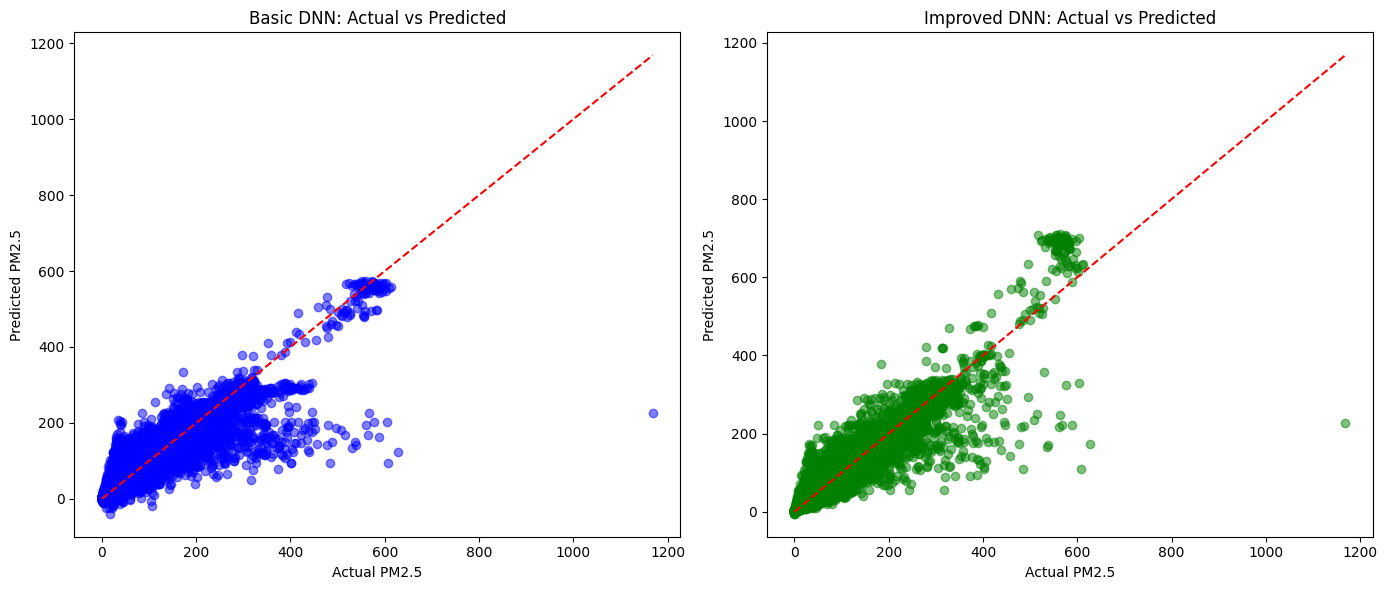

In [114]:
# ==========================
# 5. Actual vs Predicted Plots
# ==========================
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test_original, y_pred_basic, alpha=0.5, color='blue')
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()], 'r--')
plt.title("Basic DNN: Actual vs Predicted")
plt.xlabel("Actual PM2.5")
plt.ylabel("Predicted PM2.5")

plt.subplot(1, 2, 2)
plt.scatter(y_test_original, y_pred_improved, alpha=0.5, color='green')
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()], 'r--')
plt.title("Improved DNN: Actual vs Predicted")
plt.xlabel("Actual PM2.5")
plt.ylabel("Predicted PM2.5")

plt.tight_layout()
plt.show()


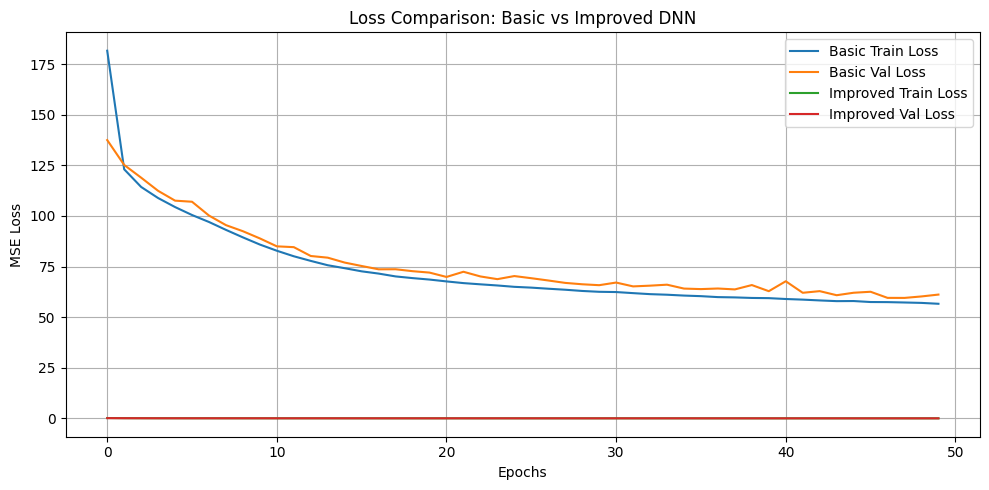

In [115]:
# ==========================
# 6. Loss Curve Comparison
# ==========================
plt.figure(figsize=(10, 5))
plt.plot(history_basic.history['loss'], label='Basic Train Loss')
plt.plot(history_basic.history['val_loss'], label='Basic Val Loss')
plt.plot(history_improved.history['loss'], label='Improved Train Loss')
plt.plot(history_improved.history['val_loss'], label='Improved Val Loss')
plt.title("Loss Comparison: Basic vs Improved DNN")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [150]:
import joblib
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load models
from tensorflow.keras.models import load_model

basic_model = load_model('basic_dnn_model.h5')
improved_model = load_model('improved_dnn_model.h5')

# Load test data
X_test_basic = np.load('X_test_scaled.npy')  # shape: (n_samples, 17)
X_test_improved = X_test_basic[:, :10]       # if your top 10 features are first 10 columns
y_test = np.load('y_test.npy')

# Load target scaler using joblib
target_scaler = joblib.load('target_scaler.pkl')

# Predict
y_pred_basic = basic_model.predict(X_test_basic)
y_pred_improved = improved_model.predict(X_test_improved)

# Inverse transform
y_pred_basic_inv = target_scaler.inverse_transform(y_pred_basic)
y_pred_improved_inv = target_scaler.inverse_transform(y_pred_improved)
y_test_inv = target_scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluation function
def evaluate(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n📊 {model_name} Evaluation Metrics:")
    print(f"MAE:  {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²:   {r2:.4f}")

# Evaluate both models
evaluate(y_test_inv, y_pred_basic_inv, "Basic DNN")
evaluate(y_test_inv, y_pred_improved_inv, "Improved DNN")


12169/12169 [==============================] - 17s 1ms/step

📊 Basic DNN Evaluation Metrics:
MAE:  522.28
RMSE: 936.66
R²:   -1051.1605

📊 Improved DNN Evaluation Metrics:
MAE:  2.04
RMSE: 6.65
R²:   0.9470


In [116]:
# ==========================
# STEP 3: Traditional Models
# ==========================
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error




In [117]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1246051, 17)
y_train shape: (1246051,)
X_test shape: (389392, 17)
y_test shape: (389392,)


In [118]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [119]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Linear Regression - MSE:", mean_squared_error(y_test, y_pred_lr))



Linear Regression - MSE: 114.76025679413274


In [120]:
# To speed up RF & XGBoost, sample smaller data if needed
sample_size = 100_000  # adjust as per system memory
X_train_small = X_train[:sample_size]
y_train_small = y_train[:sample_size]
X_test_small = X_test[:sample_size]
y_test_small = y_test[:sample_size]



In [121]:
# Random Forest (reduced trees and depth)
rf = RandomForestRegressor(
    n_estimators=50,   # fewer trees
    max_depth=10,      # limit depth
    n_jobs=-1,
    random_state=42
)
rf.fit(X_train_small, y_train_small)
y_pred_rf = rf.predict(X_test_small)
print("Random Forest - MSE:", mean_squared_error(y_test_small, y_pred_rf))

Random Forest - MSE: 29.96945439354211


In [122]:
# XGBoost (with faster settings)
xgb = XGBRegressor(
    n_estimators=50,         # fewer boosting rounds
    max_depth=8,             # shallower trees
    learning_rate=0.1,
    subsample=0.8,           # use 80% data per tree
    colsample_bytree=0.8,    # use 80% features per tree
    n_jobs=-1,
    random_state=42
)
xgb.fit(X_train_small, y_train_small)
y_pred_xgb = xgb.predict(X_test_small)
print("XGBoost - MSE:", mean_squared_error(y_test_small, y_pred_xgb))

XGBoost - MSE: 33.34860752117165


In [154]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import joblib

# Load target scaler (used earlier during training)
y_scaler = joblib.load("target_scaler.pkl")

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(
        n_estimators=50,        # reduced from 100 to 50
        max_depth=10,           # limit tree depth
        n_jobs=-1,              # use all CPU cores
        random_state=42
    ),
    "XGBoost": XGBRegressor(
        n_estimators=50,        # reduced from 100 to 50
        learning_rate=0.1,
        max_depth=5,
        n_jobs=-1,              # use all CPU cores
        verbosity=0,
        random_state=42
    )
}


# Dictionary to store results
results = {}

# Fit and evaluate each model
for name, model in models.items():
    # Train on scaled training data
    model.fit(X_train_scaled, y_train_scaled.ravel())

    # Predict on scaled test data
    y_pred_scaled = model.predict(X_test_scaled).reshape(-1, 1)

    # Inverse transform to get predictions in original scale
    y_pred = y_scaler.inverse_transform(y_pred_scaled)

    # Ground truth (original scale)
    y_true = y_scaler.inverse_transform(y_test_scaled)

    # Metrics
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    # Store results
    results[name] = {"MAE": mae, "RMSE": rmse, "R2 Score": r2}

# Display all results
for model_name, metrics in results.items():
    print(f"\n📊 {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")



📊 Linear Regression
MAE: 5.2841
RMSE: 14.6366
R2 Score: 0.7431

📊 Random Forest
MAE: 1.9109
RMSE: 6.8625
R2 Score: 0.9435

📊 XGBoost
MAE: 2.2810
RMSE: 8.2973
R2 Score: 0.9174


In [123]:
correlations = X_train.corrwith(y_train).abs().sort_values(ascending=False)
print("Top 10 Correlated Features:\n", correlations.head(10))


C:\Users\monus\AirQualityProject\tfvenv\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\monus\AirQualityProject\tfvenv\lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Top 10 Correlated Features:
 indicator_name
PM10           0.889713
PM1.0          0.766269
Temperature    0.163728
Pressure       0.052866
CO₂            0.029105
day            0.028662
Humidity       0.027939
O₃             0.023983
weekday        0.014000
CH₂O           0.007235
dtype: float64
